In [1]:
import numpy as np
from sklearn.mixture import GaussianMixture
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#local path where the data locates, change it to your local path
record= pd.read_csv("Desktop/Carnivore_Research/CS_21Jan27.csv")

In [3]:
col=['Time_Seen','Species','Latitude','Longitude','Media']

In [4]:
record.columns = col
record['Time_Seen'] = pd.to_datetime(record.Time_Seen,utc=True).copy()
record['Month'] = record.Time_Seen.dt.month
record['Hour'] = record.Time_Seen.dt.hour
record['Year'] = record.Time_Seen.dt.year

In [5]:
#king county boundaries
maxLat = 47.7763
minLat = 47.1878
maxLon = -121.0941
minLon = -122.5346

In [6]:
rec19 = record[record.Year == 2019]


In [7]:
rec19_coyo = rec19[rec19.Species == 'Coyote']

In [8]:
rec19_coyo = rec19_coyo.drop(['Time_Seen','Species','Month','Hour','Year','Media'],axis=1)

In [9]:
rec19_king = rec19_coyo[(rec19_coyo['Latitude']>minLat)&(rec19_coyo['Latitude']<maxLat)&(rec19_coyo['Longitude']>minLon)&(rec19_coyo['Longitude']<maxLon)]

In [10]:
coyoGuassianClus = GaussianMixture(n_components = 6)

In [11]:
coyoGuassianClus.fit(rec19_king)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=6, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

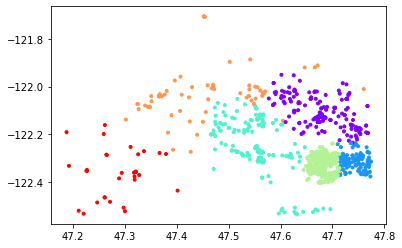

In [12]:
plt.scatter(rec19_king.iloc[:,0], rec19_king.iloc[:,1], c=coyoGuassianClus.predict(rec19_king), cmap='rainbow',marker='.')

In [13]:
clus_labels = coyoGuassianClus.predict(rec19_king)

In [14]:
#saving the dataframe to csv locally, used for importing to arcgis
GuassianDF = pd.DataFrame(rec19_king.copy())
GuassianDF["labels"] =clus_labels
GuassianDF.to_csv('coyoGuassianClus6_lat_long.csv')